In [3]:
# Import necessary libraries
import pandas as pd
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize, VecMonitor
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import EvalCallback
from scipy.signal import find_peaks
from utils.fetch_data_with_indicators import Api, fetch_data_with_indicators
from meta.peaks_env import CryptoTradingEnv
from extractors.lstm_extractor import CustomCombinedExtractor

In [5]:
# ====================================
# Load Data
# ====================================

data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2015-01-01', '2023-01-01', '1d', ['RSI', 'EMA_50'])

data = data.copy()  # Make a full copy
data['Pct Change'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)

peaks, properties = find_peaks(data['Close'], height=100, prominence=5, distance=40)

data['Peak'] = 0
data.loc[data.index[peaks], 'Peak'] = 1

# Define number of features (used in observation space)
num_features = 5

env = DummyVecEnv([lambda: CryptoTradingEnv(data)])
env = VecNormalize(env, norm_obs=True, norm_reward=True)
env = VecMonitor(env)

check_env(env.envs[0])

policy_kwargs = dict(
    features_extractor_class=CustomCombinedExtractor,
    features_extractor_kwargs=dict(features_dim=128),
)

eval_callback = EvalCallback(env, best_model_save_path='./test_models/',
                             log_path='./tensorboard_logs/', eval_freq=10000,
                             deterministic=True, render=False, verbose=0)

[*********************100%***********************]  1 of 1 completed
/home/tommy/Downloads/ai-playground/.venv/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:263: UserWarning: Your observation prices has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


In [6]:
model = PPO('MultiInputPolicy', env, verbose=1, policy_kwargs=policy_kwargs, tensorboard_log="./tensorboard_logs/", learning_rate=0.0002)
model.learn(total_timesteps=100_000, callback=eval_callback)

Using cuda device
Logging to ./tensorboard_logs/PPO_3


KeyboardInterrupt: 

[*********************100%***********************]  1 of 1 completed


Step: 11, Net Worth: 1000.0, Balance: 1000, Crypto Held: 0, Last Reward: 0, Last Action: 2, Avg Buy Price: 0, Avg Sell Price: 0
Step: 12, Net Worth: 1000.0, Balance: 1000, Crypto Held: 0, Last Reward: 0, Last Action: 2, Avg Buy Price: 0, Avg Sell Price: 0
Step: 13, Net Worth: 1000.0, Balance: 1000, Crypto Held: 0, Last Reward: 0, Last Action: 2, Avg Buy Price: 0, Avg Sell Price: 0
Step: 14, Net Worth: 1000.0, Balance: 1000, Crypto Held: 0, Last Reward: 0, Last Action: 2, Avg Buy Price: 0, Avg Sell Price: 0
Step: 15, Net Worth: 1000.0, Balance: 1000, Crypto Held: 0, Last Reward: 0, Last Action: 2, Avg Buy Price: 0, Avg Sell Price: 0
Step: 16, Net Worth: 1000.0, Balance: 1000, Crypto Held: 0, Last Reward: 0, Last Action: 2, Avg Buy Price: 0, Avg Sell Price: 0
Step: 17, Net Worth: 1000.0, Balance: 1000, Crypto Held: 0, Last Reward: 0, Last Action: 2, Avg Buy Price: 0, Avg Sell Price: 0
Step: 18, Net Worth: 1000.0, Balance: 1000, Crypto Held: 0, Last Reward: 0, Last Action: 2, Avg Buy Pric

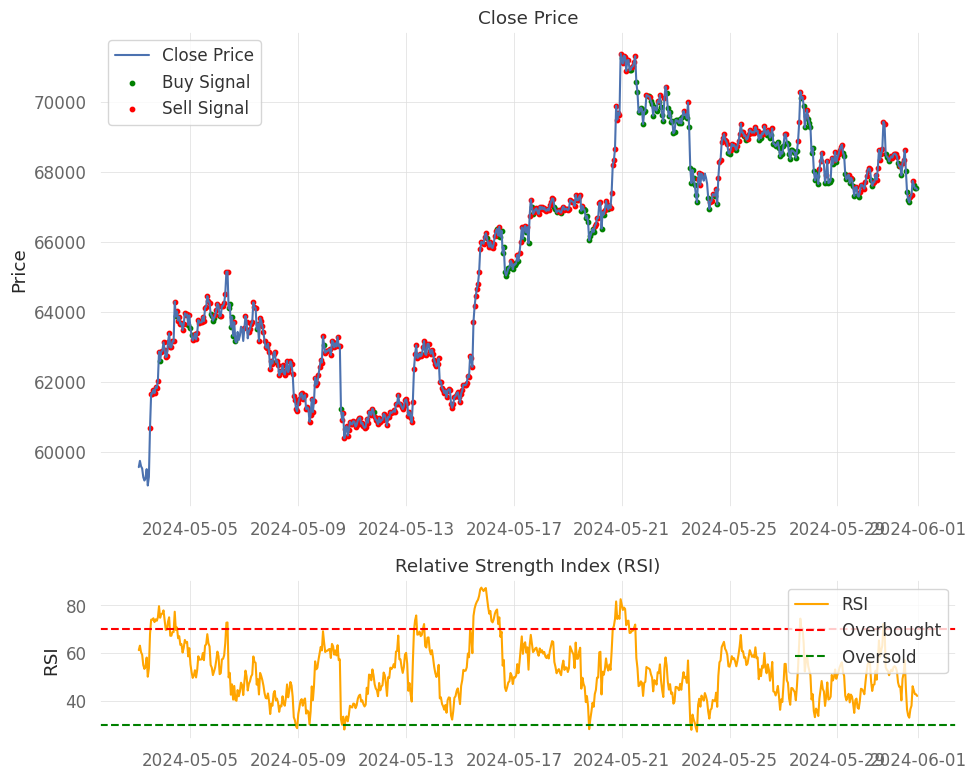

                    Strategy
------------------  ----------
Start Period        2024-05-03
End Period          2026-03-17
Risk-Free Rate      0.0%
Time in Market      99.0%

Cumulative Return   11.13%
CAGR﹪              3.97%

Sharpe              0.62
Prob. Sharpe Ratio  84.45%
Sortino             0.9
Sortino/√2          0.64
Omega               1.12

Max Drawdown        -6.08%
Longest DD Days     261

Gain/Pain Ratio     0.12
Gain/Pain (1M)      0.8

Payoff Ratio        1.09
Profit Factor       1.12
Common Sense Ratio  1.13
CPC Index           0.62
Tail Ratio          1.01
Outlier Win Ratio   3.97
Outlier Loss Ratio  3.81

MTD                 -1.1%
3M                  -0.39%
6M                  0.42%
YTD                 -1.33%
1Y                  4.21%
3Y (ann.)           3.97%
5Y (ann.)           3.97%
10Y (ann.)          3.97%
All-time (ann.)     3.97%

Avg. Drawdown       -1.19%
Avg. Drawdown Days  30
Recovery Factor     1.84
Ulcer Index         0.03
Serenity Index      0.3


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


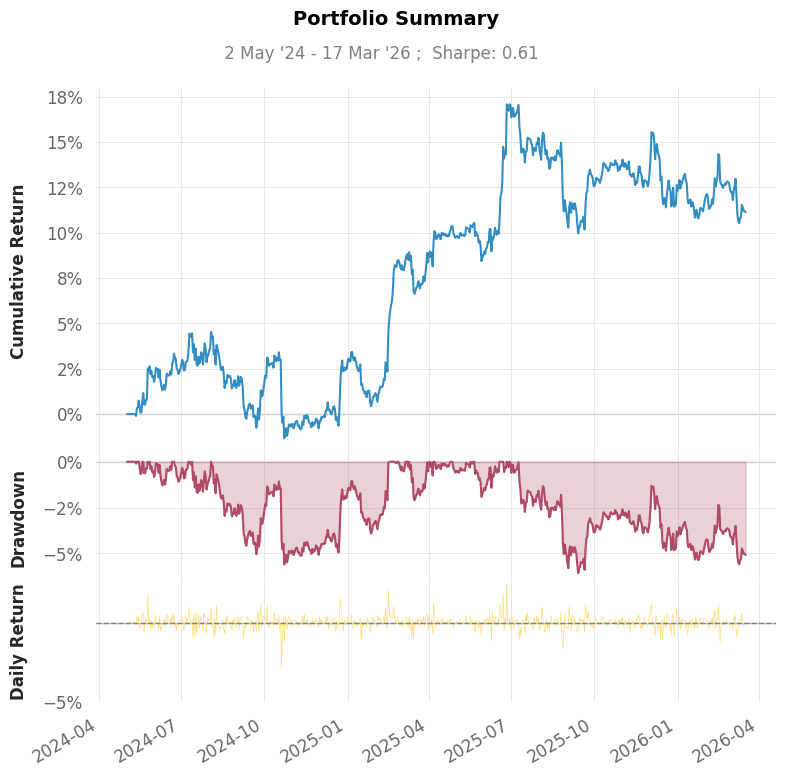

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


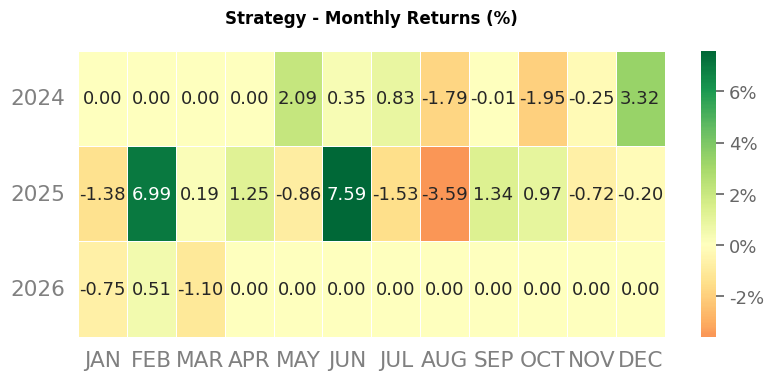

In [ ]:
import quantstats as qs

from utils.charts.plot_data_with_rsi import plot_data_with_rsi

# ====================================
# Model Evaluation (Optional)
# ====================================

test_data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2024-05-01', '2024-06-01', '1h', ['RSI', 'EMA_50'])

test_data = test_data.copy()  # Make a full copy
test_data['Pct Change'] = test_data['Close'].pct_change() * 100
test_data.dropna(inplace=True)

peaks, properties = find_peaks(test_data['Close'], height=100, prominence=5, distance=40)

test_data['Peak'] = 0
test_data.loc[test_data.index[peaks], 'Peak'] = 1

eval_env = DummyVecEnv([lambda: CryptoTradingEnv(test_data)])
eval_env = VecNormalize(eval_env, norm_obs=True, norm_reward=False)

portfolio_values = []

model = PPO.load('./models/PPO_PARTIAL_LSTM_64_1_peaks_with_fee')

obs = eval_env.reset()
done = False
state = None
while not done:
    action, state = model.predict(obs, state=state, deterministic=True)
    obs, reward, done, info = eval_env.step(action)
    
    portfolio_values.append(info[0]['net_worth'])
    
    eval_env.render()
    
    if done:
        actions_history = info[0]['actions_history']
        print('Episode done!')
    
eval_env.close()

# ====================================
# Portfolio Analysis
# ====================================

actions_history.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_history)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)

